# Milestone 2: baseline models
___

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import import_preprocess, baseline_models
from importlib import reload
reload(import_preprocess)
reload(baseline_models)

from import_preprocess import ImportPreprocess, convert_labels_to_string, convert_labels_to_int
from baseline_models import XGBoostClassifier, MajorityClassClassifier, RuleBasedClassifier, NaiveBayesClassifier, LogisticRegression, LSTM_Model, get_all_predictions

In [2]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_val_test()
import_preprocess.create_balanced_dataset()

X_train, y_train, S_train, y_train_multi = import_preprocess.X_train, import_preprocess.y_train, import_preprocess.S_train, import_preprocess.y_train_multi
X_val, y_val, S_val, y_val_multi = import_preprocess.X_val, import_preprocess.y_val, import_preprocess.S_val, import_preprocess.y_val_multi
X_test, y_test, S_test, y_test_multi = import_preprocess.X_test, import_preprocess.y_test, import_preprocess.S_test, import_preprocess.y_test_multi
X_balanced, y_balanced = import_preprocess.X_train_balanced, import_preprocess.y_train_balanced

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test)) 
print("Number of balanced samples:", len(X_balanced))

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000
Number of balanced samples: 10000


In [3]:
# import_preprocess.convert_class_labels()
# y_train, y_dev, y_test = import_preprocess.y_train, import_preprocess.y_dev, import_preprocess.y_test

In [4]:
#X_train_dev, y_train_val = import_preprocess.concatenate_train_val()
#len(X_train_dev)
S_train[1]

'This is like the Metallica video where the poor mutilated bastard was saying "Please kill me" over and over again, only with emojis instead of Morse code.'

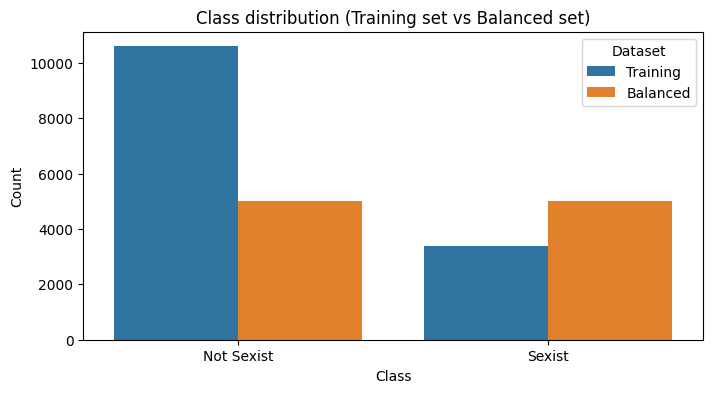

In [5]:
plot_data = pd.DataFrame({
    'Class': ['Not Sexist', 'Sexist'],
    'Training': [y_train.count('not sexist'), y_train.count('sexist')],
    'Balanced': [y_balanced.count('not sexist'), y_balanced.count('sexist')]
})
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')
plt.figure(figsize=(8, 4))
sns.barplot(x='Class', y='Count', hue='Dataset', data=plot_data_melted)
plt.title('Class distribution (Training set vs Balanced set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [6]:
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])
balanced_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])

#### a) Traditional (non-DL) baseline models

1. majority class classifier

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.7573
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################


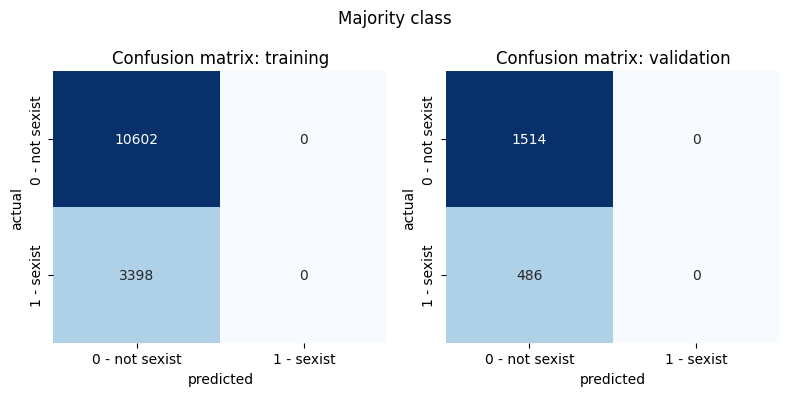

In [7]:
majority_class_classifier = MajorityClassClassifier()
majority_class_classifier.train(None, y_train, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="Majority class")
for res_x in res:
    results.loc[len(results)] = res_x

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.5000
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################


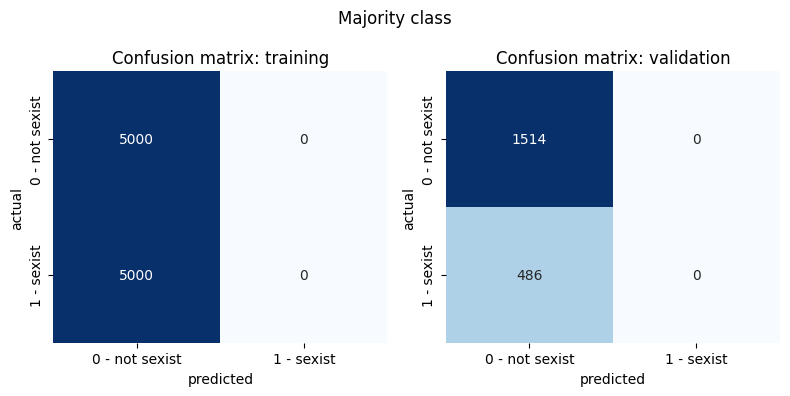

In [8]:
majority_class_classifier.train(None, y_balanced, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="Majority class")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

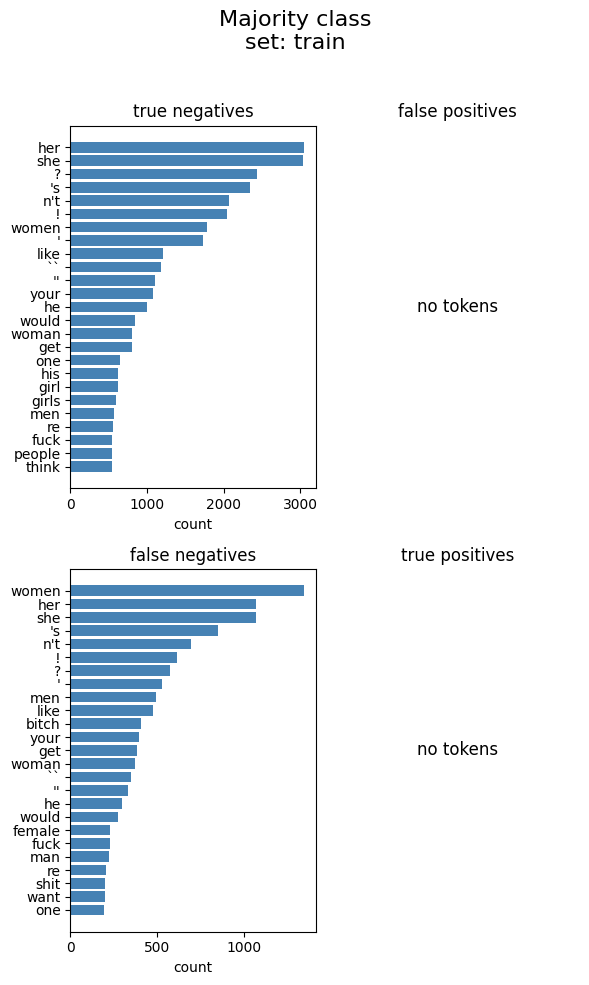

In [9]:
majority_class_classifier.qualitative_analysis_top_tokens(X_train, X_train, y_train, set_type="train", model_name="Majority class", plot=True)

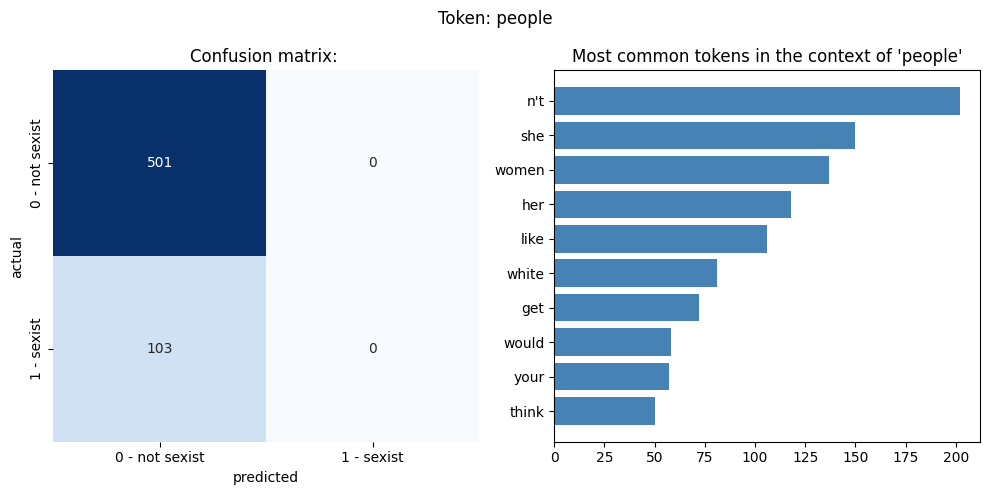

Examples:
Label: not sexist
Because i rate humans on a scale for attractivness like 90% of people i know IRL it just so happens women are disgusted by me-and i dont even do it IRL ?

Label: not sexist
Pompous asshole Dems show why the paying people of the USA deplore what the Beltway has become! Pathetic display of moronic childishness!

Label: sexist
Yes, because she made a mistake,she SHOULD pay for it. It was her mistake not society's. I'm all for legit help for someone in need but people who fuck around, don't use protection and then expect to get bailed out can go screw

Label: not sexist
I actually don't think there is anything wrong with the ad. She may have done extraordinarily, but that does not reflect poorly on men nor well upon women. It just means she is extraordinary, each sex has some extraordinary people.

Label: sexist
Nope, nothing happened. She never filed a police report... she just "confided" in the right people and the rumor mill did the rest. A lot of politics in

In [10]:
majority_class_classifier.get_context_for_token("people", X_train, y_train, X_train, S_train, no_examples=5, return_contexts=False)

2. regex classifier (rule-based)

########################################

Metrics for training
accuracy: 0.7164
balanced accuracy: 0.5732
precision: 0.3890
recall: 0.2949

########################################

Metrics for validation
accuracy: 0.7075
balanced accuracy: 0.5630
precision: 0.3673
recall: 0.2819

########################################


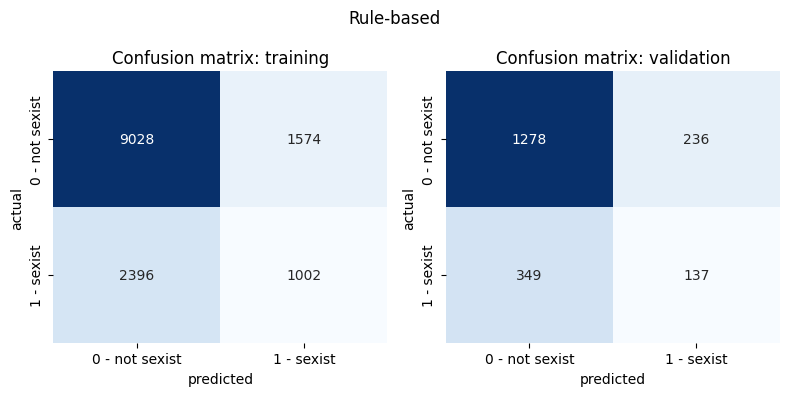

In [11]:
patterns = [
    r"\b(slut|bitch|fuck|fucking|sex)\b",
    r"\b(she has|she has to|she must|she shouldn't|women have to|women must|women shouldn't)\b",
    r"\b(hate|die)\b"
]

regex_classifier = RuleBasedClassifier(patterns)
res = regex_classifier.evaluate({"training": S_train, "validation": S_val}, [y_train, y_val], model_name="Rule-based")
for res_x in res:
    results.loc[len(results)] = res_x

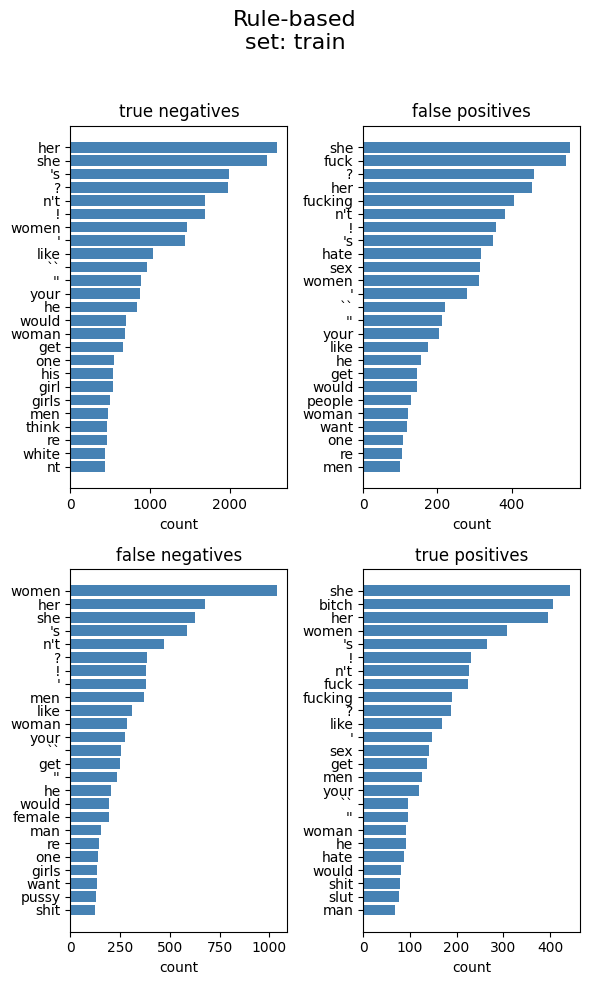

In [12]:
regex_classifier.qualitative_analysis_top_tokens(X_train, S_train, y_train, set_type="train", model_name="Rule-based", plot=True)

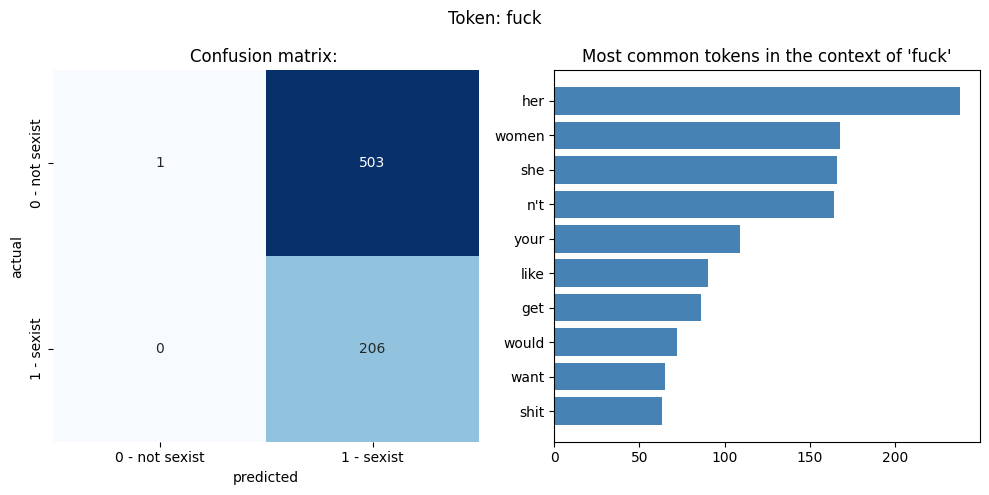

Examples:
Label: not sexist
Who the fuck vacations in Haiti? Who grabs the wife & kids & is like "Lets spend this summer in a garbage dump eating mud cakes"? [URL]

Label: sexist
Yes, because she made a mistake,she SHOULD pay for it. It was her mistake not society's. I'm all for legit help for someone in need but people who fuck around, don't use protection and then expect to get bailed out can go screw

Label: sexist
Stop being a fuckin pussy and tell her to grow the fuck up.

Label: sexist
1406 BCE. Your grandmas pussy must be dry as fuck!

Label: sexist
Well we already had a feminist doctor killing off patients (Fuck you Dr. Barton, burn in hell cunt.) This is not surprising. The government want the men dead, and they'll get every woman in on it that they can.


In [13]:
regex_classifier.get_context_for_token("fuck", S_train, y_train, X_train, S_train, no_examples=5, return_contexts=False)

3. Naive Bayes (NB)

########################################

Metrics for training
accuracy: 0.8646
balanced accuracy: 0.7938
precision: 0.7541
recall: 0.6563

########################################

Metrics for validation
accuracy: 0.8195
balanced accuracy: 0.7187
precision: 0.6632
recall: 0.5226

########################################


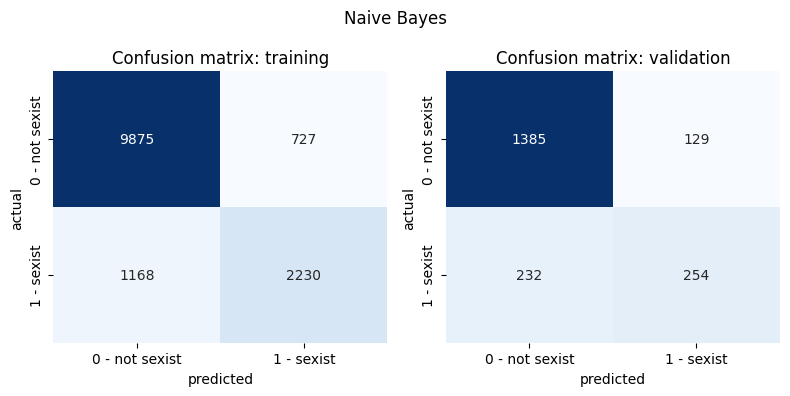

In [14]:
X_train_bow, X_val_bow, X_test_bow, X_train_val_bow, feature_names = import_preprocess.create_bow_representation()

naive_bayes_classifier = NaiveBayesClassifier()
naive_bayes_classifier.train(X_train_bow, y_train, None, None)

res = naive_bayes_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Naive Bayes")
for res_x in res:
    results.loc[len(results)] = res_x

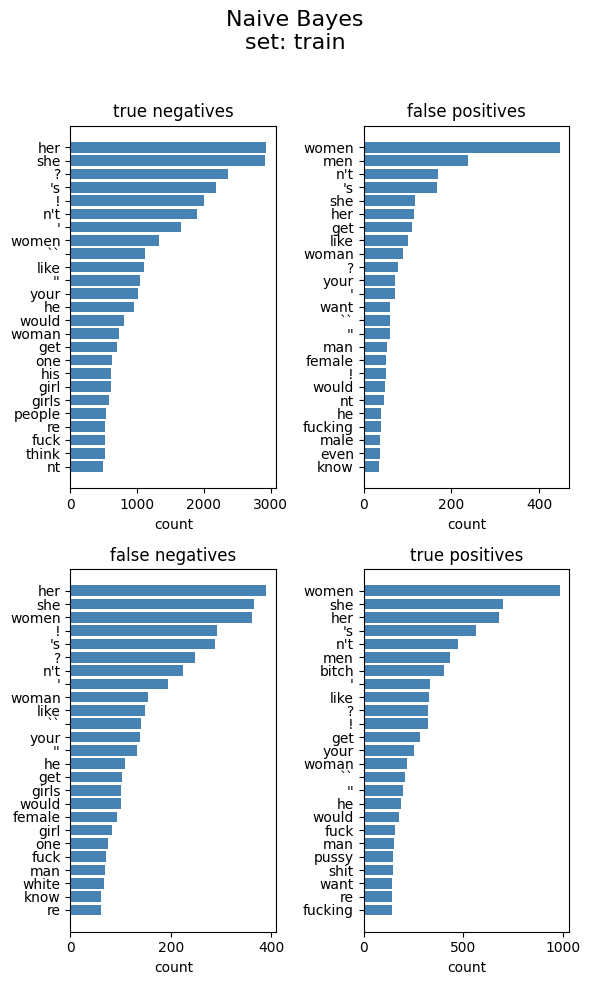

In [15]:
naive_bayes_classifier.qualitative_analysis_top_tokens(X_train, X_train_bow, y_train, set_type="train", model_name="Naive Bayes", plot=True)

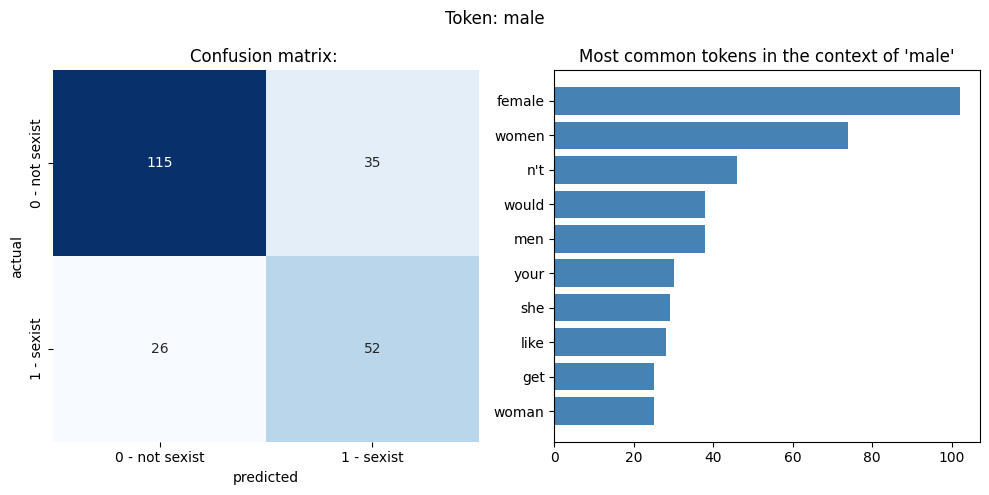

Examples:
Label: not sexist
It found that the male student accused the female student of sexual assault as âa tactical maneuver and in bad faith.â Belieeeeeve the **female** victim!

Label: sexist
Male dolphin wakes up next to female whale. "Aww man! I thought you were just a fat chick! You're a whale?!" (My apologies to women who are a little heavier than average, I adore you.) ( no really I f-ing ADORE you.)

Label: sexist
And there we have the root cause of the "white male problem"... white women are to blame

Label: sexist
Sheâs probably on her back getting her legs stretched out and getting fucked by a genetically superior male while sheâs text you for her own amusement. Sorry man, itâs over

Label: not sexist
like almost all sports the main events are open to both genders but they are utterly male dominated so all sports have female only events that exist to give women money fame and medals too


In [16]:
naive_bayes_classifier.get_context_for_token("male", X_train_bow, y_train, X_train, S_train, no_examples=5, return_contexts=False)

In [17]:
top_tn_tokens, top_fp_tokens, top_fn_tokens, top_tp_tokens = \
    naive_bayes_classifier.qualitative_analysis_top_tokens(
        X_train, X_train_bow, y_train, set_type="train", 
        model_name="Naive Bayes", plot=False, top_n=50)

########################################

Metrics for training
accuracy: 0.8320
balanced accuracy: 0.8320
precision: 0.8232
recall: 0.8456

########################################

Metrics for validation
accuracy: 0.7255
balanced accuracy: 0.6971
precision: 0.4541
recall: 0.6420

########################################


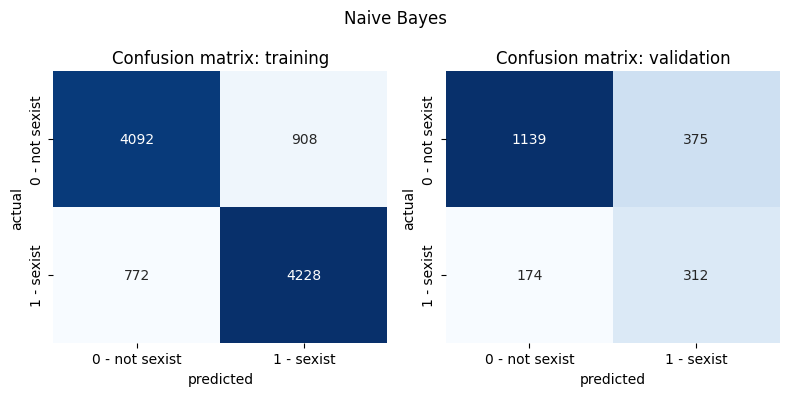

In [18]:
X_train_balanced_bow, X_val_balanced_bow, X_test_balanced_bow, X_train_val_balanced_bow, feature_names = import_preprocess.create_bow_representation(balanced=True)
naive_bayes_classifier.train(X_train_balanced_bow, y_balanced, None, None)

res = naive_bayes_classifier.evaluate({"training": X_train_balanced_bow, "validation": X_val_balanced_bow}, [y_balanced, y_val], model_name="Naive Bayes")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

4. Logisitic Regression

########################################

Metrics for training
accuracy: 0.8916
balanced accuracy: 0.8016
precision: 0.8957
recall: 0.6265

########################################

Metrics for validation
accuracy: 0.8300
balanced accuracy: 0.7075
precision: 0.7355
recall: 0.4691

########################################


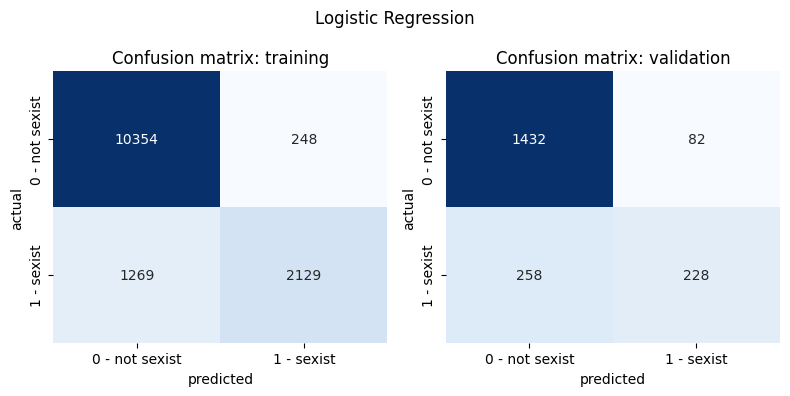

In [19]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.train(X_train_bow, y_train, None, None)

res = log_reg_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Logistic Regression")
for res_x in res:
    results.loc[len(results)] = res_x

########################################

Metrics for training
accuracy: 0.9158
balanced accuracy: 0.9158
precision: 0.9245
recall: 0.9056

########################################

Metrics for validation
accuracy: 0.6395
balanced accuracy: 0.5530
precision: 0.3071
recall: 0.3848

########################################


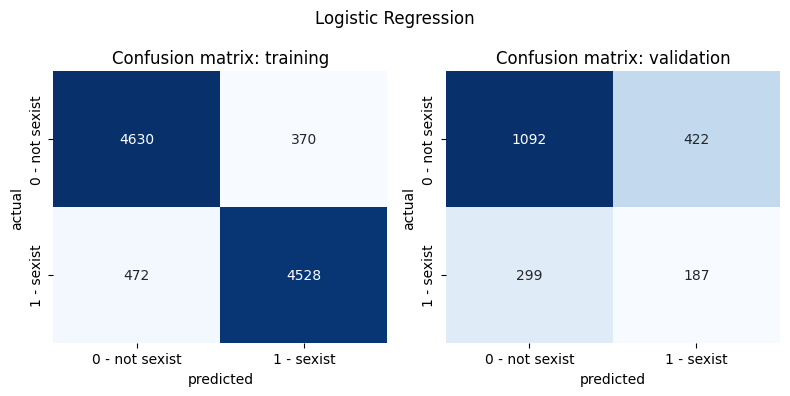

In [20]:
log_reg_classifier.train(X_train_balanced_bow, y_balanced, None, None)

res = log_reg_classifier.evaluate({"training": X_train_balanced_bow, "validation": X_val_bow}, [y_balanced, y_val], model_name="Logistic Regression")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (using BoW representation)

[0]	train-logloss:0.53009	eval-logloss:0.53454
[1]	train-logloss:0.51116	eval-logloss:0.51866
[2]	train-logloss:0.49586	eval-logloss:0.50590
[3]	train-logloss:0.48348	eval-logloss:0.49566
[4]	train-logloss:0.47308	eval-logloss:0.48727
[5]	train-logloss:0.46405	eval-logloss:0.48068
[6]	train-logloss:0.45658	eval-logloss:0.47452
[7]	train-logloss:0.44996	eval-logloss:0.47000
[8]	train-logloss:0.44414	eval-logloss:0.46612
[9]	train-logloss:0.43921	eval-logloss:0.46179
[10]	train-logloss:0.43483	eval-logloss:0.45844
[11]	train-logloss:0.43071	eval-logloss:0.45608
[12]	train-logloss:0.42720	eval-logloss:0.45407
[13]	train-logloss:0.42371	eval-logloss:0.45154
[14]	train-logloss:0.42068	eval-logloss:0.44925
[15]	train-logloss:0.41710	eval-logloss:0.44717
[16]	train-logloss:0.41453	eval-logloss:0.44600
[17]	train-logloss:0.41212	eval-logloss:0.44429
[18]	train-logloss:0.40972	eval-logloss:0.44285
[19]	train-logloss:0.40777	eval-logloss:0.44189
[20]	train-logloss:0.40607	eval-logloss:0.44081
[2

c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[41]	train-logloss:0.37595	eval-logloss:0.42230
[42]	train-logloss:0.37481	eval-logloss:0.42155
[43]	train-logloss:0.37405	eval-logloss:0.42090
[44]	train-logloss:0.37289	eval-logloss:0.42025
[45]	train-logloss:0.37216	eval-logloss:0.41976
[46]	train-logloss:0.37116	eval-logloss:0.41938
[47]	train-logloss:0.37012	eval-logloss:0.41907
[48]	train-logloss:0.36936	eval-logloss:0.41866
[49]	train-logloss:0.36865	eval-logloss:0.41796
[50]	train-logloss:0.36798	eval-logloss:0.41764
[51]	train-logloss:0.36683	eval-logloss:0.41717
[52]	train-logloss:0.36541	eval-logloss:0.41648
[53]	train-logloss:0.36450	eval-logloss:0.41624
[54]	train-logloss:0.36371	eval-logloss:0.41579
[55]	train-logloss:0.36304	eval-logloss:0.41533
[56]	train-logloss:0.36184	eval-logloss:0.41516
[57]	train-logloss:0.36106	eval-logloss:0.41453
[58]	train-logloss:0.36040	eval-logloss:0.41418
[59]	train-logloss:0.35962	eval-logloss:0.41420
[60]	train-logloss:0.35888	eval-logloss:0.41414
[61]	train-logloss:0.35826	eval-logloss:

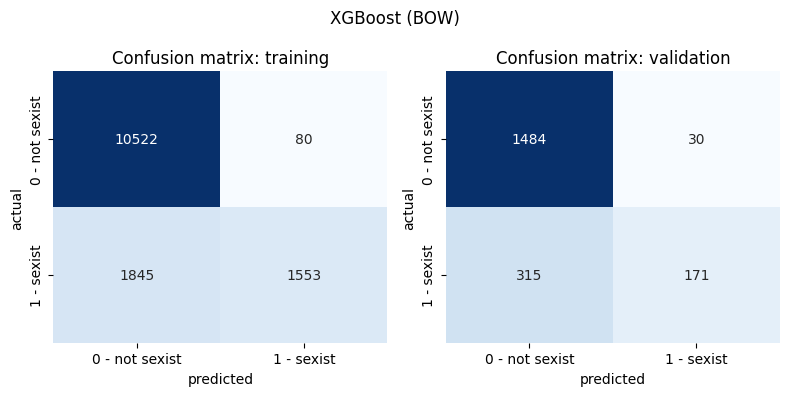

In [21]:
xg_boost_bow = XGBoostClassifier()
xg_boost_bow.train(X_train_bow, y_train, X_val_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    results.loc[len(results)] = res_x

[0]	train-logloss:0.66757	eval-logloss:0.66993
[1]	train-logloss:0.64666	eval-logloss:0.65080
[2]	train-logloss:0.62921	eval-logloss:0.63477
[3]	train-logloss:0.61464	eval-logloss:0.62145
[4]	train-logloss:0.60206	eval-logloss:0.60979
[5]	train-logloss:0.59106	eval-logloss:0.60006
[6]	train-logloss:0.58166	eval-logloss:0.59140
[7]	train-logloss:0.57330	eval-logloss:0.58429
[8]	train-logloss:0.56611	eval-logloss:0.57764
[9]	train-logloss:0.55980	eval-logloss:0.57182
[10]	train-logloss:0.55374	eval-logloss:0.56673
[11]	train-logloss:0.54832	eval-logloss:0.56155
[12]	train-logloss:0.54327	eval-logloss:0.55767
[13]	train-logloss:0.53859	eval-logloss:0.55356
[14]	train-logloss:0.53465	eval-logloss:0.54994
[15]	train-logloss:0.52974	eval-logloss:0.54627
[16]	train-logloss:0.52662	eval-logloss:0.54326
[17]	train-logloss:0.52317	eval-logloss:0.54079
[18]	train-logloss:0.52013	eval-logloss:0.53812
[19]	train-logloss:0.51657	eval-logloss:0.53603
[20]	train-logloss:0.51303	eval-logloss:0.53407
[2

c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[44]	train-logloss:0.46342	eval-logloss:0.50363
[45]	train-logloss:0.46200	eval-logloss:0.50324
[46]	train-logloss:0.46067	eval-logloss:0.50317
[47]	train-logloss:0.45947	eval-logloss:0.50247
[48]	train-logloss:0.45837	eval-logloss:0.50207
[49]	train-logloss:0.45733	eval-logloss:0.50110
[50]	train-logloss:0.45635	eval-logloss:0.50028
[51]	train-logloss:0.45432	eval-logloss:0.49948
[52]	train-logloss:0.45336	eval-logloss:0.49841
[53]	train-logloss:0.45056	eval-logloss:0.49776
[54]	train-logloss:0.44932	eval-logloss:0.49721
[55]	train-logloss:0.44809	eval-logloss:0.49653
[56]	train-logloss:0.44703	eval-logloss:0.49601
[57]	train-logloss:0.44526	eval-logloss:0.49567
[58]	train-logloss:0.44372	eval-logloss:0.49494
[59]	train-logloss:0.44277	eval-logloss:0.49469
[60]	train-logloss:0.44030	eval-logloss:0.49446
[61]	train-logloss:0.43861	eval-logloss:0.49373
[62]	train-logloss:0.43734	eval-logloss:0.49305
[63]	train-logloss:0.43642	eval-logloss:0.49240
[64]	train-logloss:0.43565	eval-logloss:

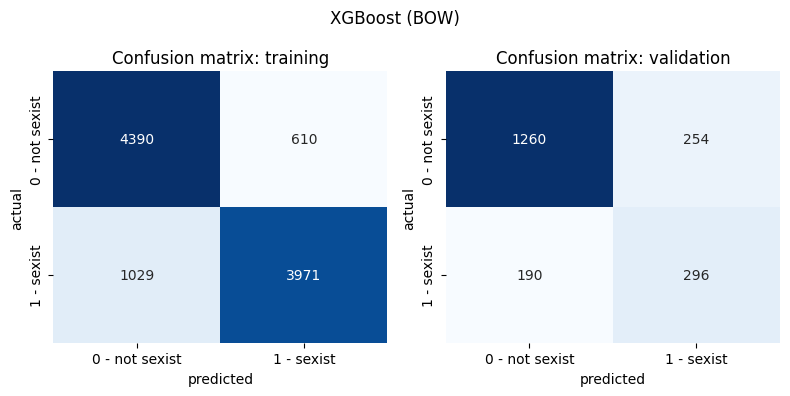

In [22]:
xg_boost_bow.train(X_train_balanced_bow, y_balanced, X_val_balanced_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_train_balanced_bow, "validation": X_val_balanced_bow}, [y_balanced, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (TF-IDF representation)

c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-logloss:0.52962	eval-logloss:0.53402
[1]	train-logloss:0.51014	eval-logloss:0.51766
[2]	train-logloss:0.49486	eval-logloss:0.50507
[3]	train-logloss:0.48210	eval-logloss:0.49557
[4]	train-logloss:0.47175	eval-logloss:0.48745
[5]	train-logloss:0.46274	eval-logloss:0.48080
[6]	train-logloss:0.45509	eval-logloss:0.47489
[7]	train-logloss:0.44848	eval-logloss:0.47013
[8]	train-logloss:0.44156	eval-logloss:0.46648
[9]	train-logloss:0.43627	eval-logloss:0.46287
[10]	train-logloss:0.43155	eval-logloss:0.46010
[11]	train-logloss:0.42750	eval-logloss:0.45750
[12]	train-logloss:0.42358	eval-logloss:0.45511
[13]	train-logloss:0.42010	eval-logloss:0.45342
[14]	train-logloss:0.41673	eval-logloss:0.45137
[15]	train-logloss:0.41364	eval-logloss:0.44973
[16]	train-logloss:0.41097	eval-logloss:0.44774
[17]	train-logloss:0.40850	eval-logloss:0.44646
[18]	train-logloss:0.40611	eval-logloss:0.44454
[19]	train-logloss:0.40392	eval-logloss:0.44295
[20]	train-logloss:0.40134	eval-logloss:0.44122
[2

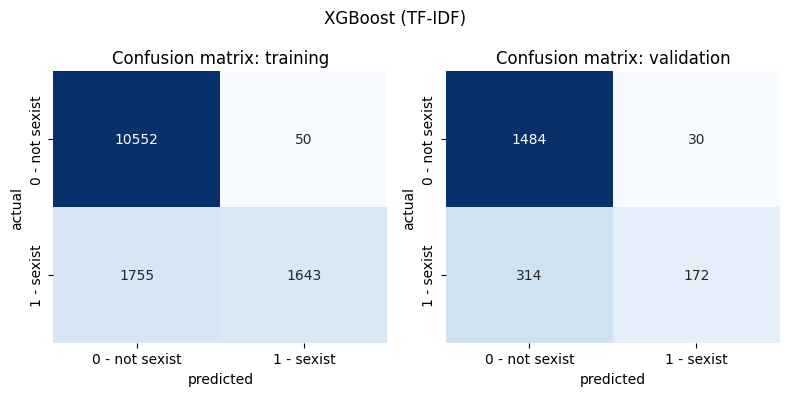

In [23]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, X_train_val_tfidf, feature_names = import_preprocess.create_tfidf_representation()

xg_boost_tfidf = XGBoostClassifier()
xg_boost_tfidf.train(X_train_tfidf, y_train, X_val_tfidf, y_val)

res = xg_boost_tfidf.evaluate({"training": X_train_tfidf, "validation": X_val_tfidf}, [y_train, y_val], model_name="XGBoost (TF-IDF)")
for res_x in res:
    results.loc[len(results)] = res_x

[0]	train-logloss:0.66702	eval-logloss:0.66923
[1]	train-logloss:0.64562	eval-logloss:0.64966
[2]	train-logloss:0.62779	eval-logloss:0.63356


c:\Users\jogip\OneDrive - TU Wien\Master\Natural Language Processing\NLP_24W_VSHJ\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	train-logloss:0.61259	eval-logloss:0.62000
[4]	train-logloss:0.59925	eval-logloss:0.60892
[5]	train-logloss:0.58802	eval-logloss:0.59880
[6]	train-logloss:0.57768	eval-logloss:0.59009
[7]	train-logloss:0.56897	eval-logloss:0.58320
[8]	train-logloss:0.56127	eval-logloss:0.57646
[9]	train-logloss:0.55345	eval-logloss:0.57093
[10]	train-logloss:0.54745	eval-logloss:0.56523
[11]	train-logloss:0.54133	eval-logloss:0.56170
[12]	train-logloss:0.53630	eval-logloss:0.55702
[13]	train-logloss:0.53003	eval-logloss:0.55326
[14]	train-logloss:0.52529	eval-logloss:0.54987
[15]	train-logloss:0.52086	eval-logloss:0.54628
[16]	train-logloss:0.51683	eval-logloss:0.54328
[17]	train-logloss:0.51350	eval-logloss:0.54036
[18]	train-logloss:0.50994	eval-logloss:0.53768
[19]	train-logloss:0.50711	eval-logloss:0.53542
[20]	train-logloss:0.50395	eval-logloss:0.53277
[21]	train-logloss:0.50101	eval-logloss:0.53075
[22]	train-logloss:0.49684	eval-logloss:0.52915
[23]	train-logloss:0.49441	eval-logloss:0.52672

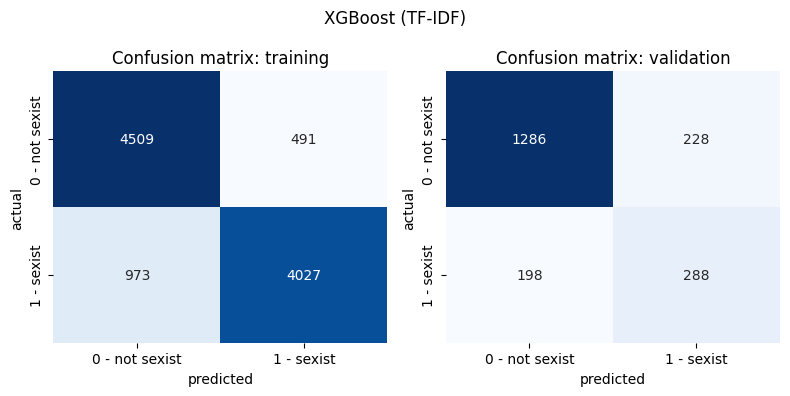

In [24]:
X_train_balanced_tfidf, X_val_balanced_tfidf, X_test_balanced_tfidf, X_train_val_balanced_tfidf, feature_names = import_preprocess.create_tfidf_representation(balanced=True)

xg_boost_tfidf.train(X_train_balanced_tfidf, y_balanced, X_val_balanced_tfidf, y_val)

res = xg_boost_tfidf.evaluate({"training": X_train_balanced_tfidf, "validation": X_val_balanced_tfidf}, [y_balanced, y_val], model_name="XGBoost (TF-IDF)")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

#### b) DL baseline models

1. LSTM

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7591 - loss: 0.5511 - val_accuracy: 0.7570 - val_loss: 0.5561
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7596 - loss: 0.5526 - val_accuracy: 0.7570 - val_loss: 0.5534
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7611 - loss: 0.5385 - val_accuracy: 0.7575 - val_loss: 0.5021
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7759 - loss: 0.4852 - val_accuracy: 0.7995 - val_loss: 0.4792
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8371 - loss: 0.4048 - val_accuracy: 0.7765 - val_loss: 0.5547
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8674 - loss: 0.3343 - val_accuracy: 0.8260 - val_loss: 0.4183
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8953 - loss: 0.2871 - val_accuracy: 0.7920 - val_loss: 0.4646
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9054 - loss: 0.2671 - val_accuracy: 0.

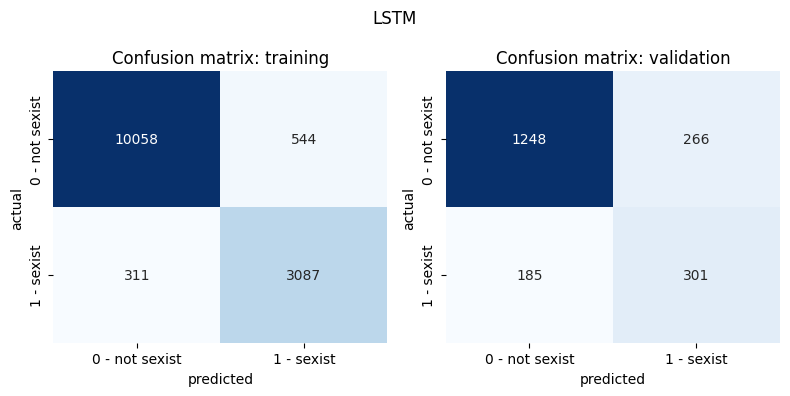

In [25]:
y_train = convert_labels_to_int(y_train)
y_balanced = convert_labels_to_int(y_balanced)
y_val = convert_labels_to_int(y_val)

rnn = LSTM_Model()
rnn.train(X_train, y_train, X_val, y_val)
res = rnn.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="LSTM")
for res_x in res:
    results.loc[len(results)] = res_x

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


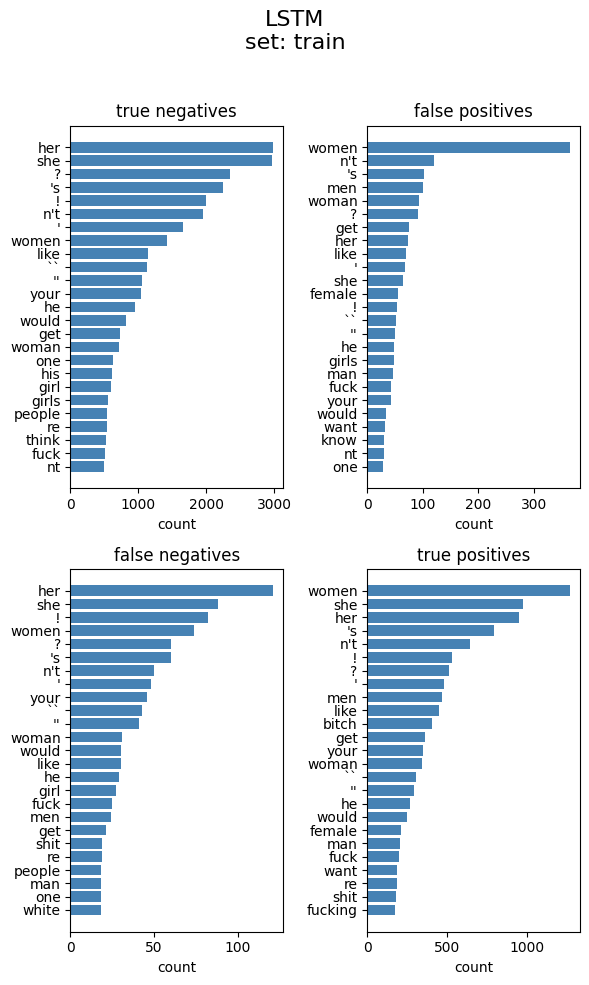

In [26]:
rnn.qualitative_analysis_top_tokens(X_train, X_train, y_train, set_type="train", model_name="LSTM", plot=True)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


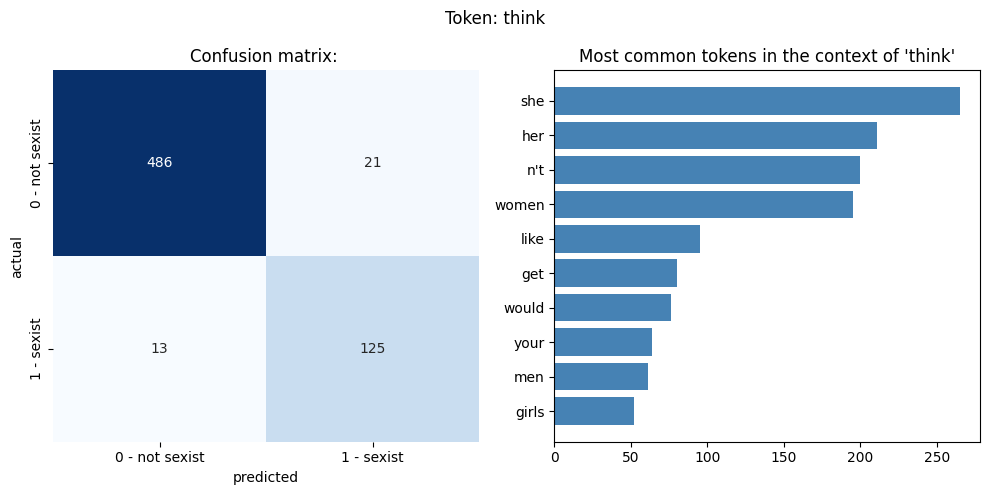

Examples:
Label: not sexist
But "he" looks very much was born in a female body and did nothing to change that. I think if "he" is attractive enough of a female, she would definitely want to have sex with him.

Label: not sexist
You think Gen Z is going to be bad, just wait for the Millenial's kids to hit college age

Label: not sexist
I actually don't think there is anything wrong with the ad. She may have done extraordinarily, but that does not reflect poorly on men nor well upon women. It just means she is extraordinary, each sex has some extraordinary people.

Label: not sexist
sounds like youâre still living in the 1950s. and maybe think about why women have to rest so much while pregnant maybe even ask your mother iâm sure sheâd be disappointed

Label: not sexist
Theyâll do it anyway. I think itâs not uncommon for women to get assaulted when theyâre sick and medicated.


In [27]:
rnn.get_context_for_token("think", X_train, y_train, X_train, S_train, no_examples=5, return_contexts=False)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5052 - loss: 0.6939 - val_accuracy: 0.2435 - val_loss: 0.6976
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4948 - loss: 0.6936 - val_accuracy: 0.2430 - val_loss: 0.6945
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5283 - loss: 0.6883 - val_accuracy: 0.7640 - val_loss: 0.5610
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7484 - loss: 0.5400 - val_accuracy: 0.7600 - val_loss: 0.5322
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8506 - loss: 0.3605 - val_accuracy: 0.5760 - val_loss: 0.6899
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9027 - loss: 0.2599 - val_accuracy: 0.8090 - val_loss: 0.4857
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9330 - loss: 0.1918 - val_accuracy: 0.7790 - val_loss: 0.5967
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9457 - loss: 0.1592 - val_accuracy: 0.

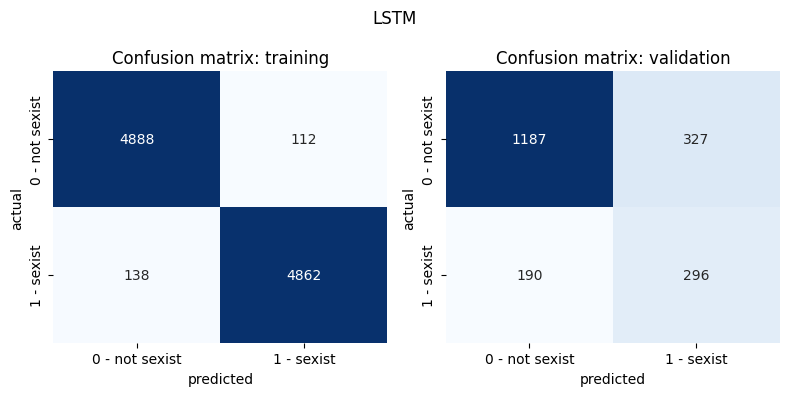

In [28]:
# y_train = convert_labels_to_int(y_train)
# y_balanced = convert_labels_to_int(y_balanced)
# y_val = convert_labels_to_int(y_val)
rnn.train(X_balanced, y_balanced, X_val, y_val)
res = rnn.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="LSTM")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


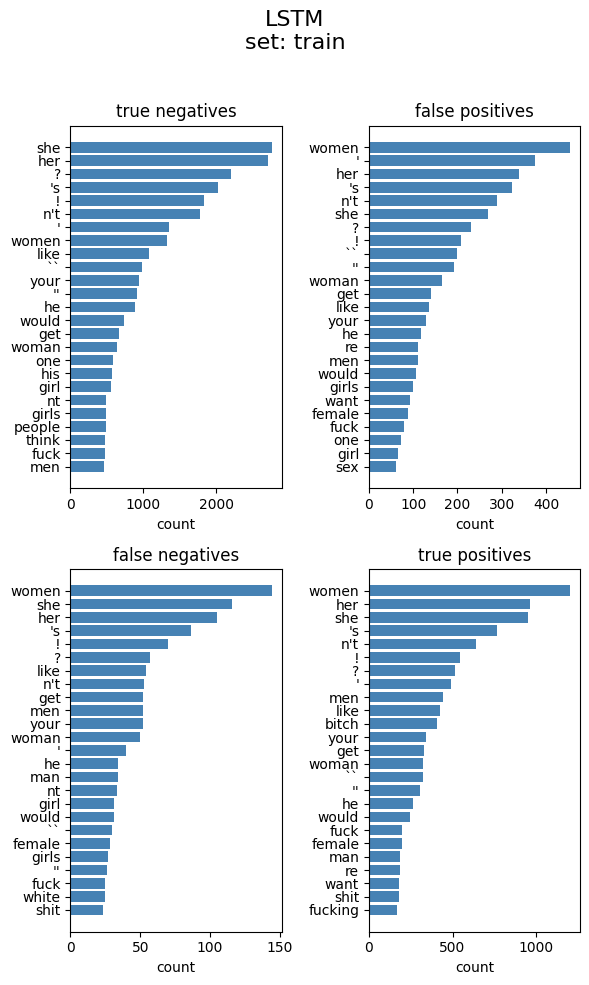

In [29]:
rnn.qualitative_analysis_top_tokens(X_train, X_train, y_train, set_type="train", model_name="LSTM", plot=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


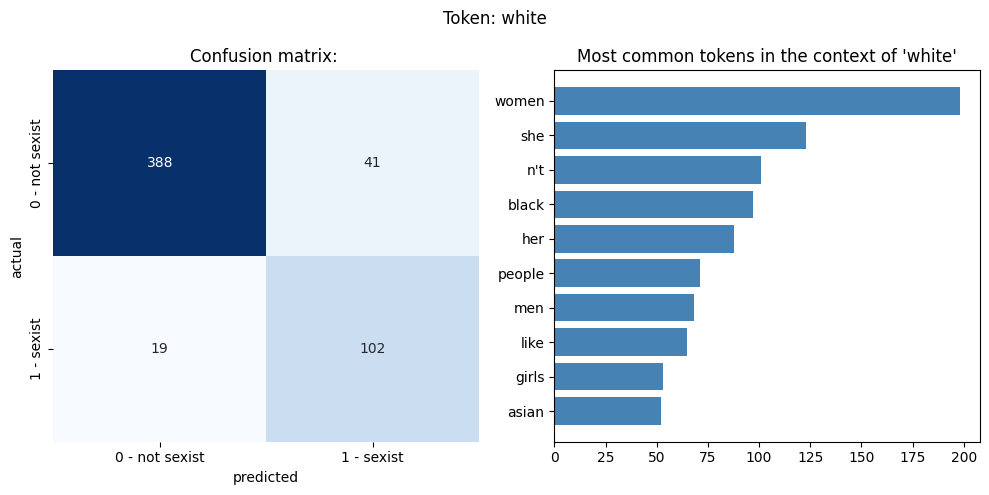

Examples:
Label: not sexist
Globalist groupie Twatter hates white people... but they love that Sharia Law, because it offers âlegalâ rape of women and children.

Label: not sexist
see also: Apple's former diversity officer who was a black woman, says a group of white men could be diverse due to different life experiences, then gets replaced by a white woman This would turn any person insane, holy fuck.

Label: not sexist
As if white men don't commit more violent crime than black women?

Label: not sexist
Feminism has destroyed all demographics except for upper middle class white American women.

Label: not sexist
Always one in the crowd, see those two little white specs right of the shack, dead birds. Generating juice at the expense of wild life, and it's not even a pitcher of juice at that.


In [36]:
rnn.get_context_for_token("white", X_train, y_train, X_train, S_train, no_examples=5, return_contexts=False)

## Results

In [30]:
results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.757286,0.500000,0.000000,0.000000
1,Majority class,validation,0.757000,0.500000,0.000000,0.000000
2,Rule-based,training,0.716429,0.573208,0.388975,0.294879
3,Rule-based,validation,0.707500,0.563007,0.367292,0.281893
4,Naive Bayes,training,0.864643,0.793848,0.754143,0.656268
5,Naive Bayes,validation,0.819500,0.718714,0.663185,0.522634
6,Logistic Regression,training,0.891643,0.801577,0.895667,0.626545
7,Logistic Regression,validation,0.830000,0.707487,0.735484,0.469136
8,XGBoost (BOW),training,0.862500,0.724744,0.951010,0.457034
9,XGBoost (BOW),validation,0.827500,0.666018,0.850746,0.351852


In [31]:
balanced_results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.5000,0.500000,0.000000,0.000000
1,Majority class,validation,0.7570,0.500000,0.000000,0.000000
2,Naive Bayes,training,0.8320,0.832000,0.823209,0.845600
3,Naive Bayes,validation,0.7255,0.697144,0.454148,0.641975
4,Logistic Regression,training,0.9158,0.915800,0.924459,0.905600
5,Logistic Regression,validation,0.6395,0.553021,0.307061,0.384774
6,XGBoost (BOW),training,0.8361,0.836100,0.866841,0.794200
7,XGBoost (BOW),validation,0.7780,0.720643,0.538182,0.609053
8,XGBoost (TF-IDF),training,0.8536,0.853600,0.891324,0.805400
9,XGBoost (TF-IDF),validation,0.7870,0.720999,0.558140,0.592593


In [32]:
models_dict = {
    "Majority Class": majority_class_classifier,
    "Naive Bayes": naive_bayes_classifier,
    "Logistic Regression": log_reg_classifier,
    "XGBoost (BOW)": xg_boost_bow,
    "LSTM": rnn
}

predictions = get_all_predictions(models_dict, X_val[1], X_val_bow[1], y_val[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [33]:
predictions

{'true': 'not sexist',
 'Majority Class': ['not sexist'],
 'Naive Bayes': array(['sexist'], dtype='<U10'),
 'Logistic Regression': array(['sexist'], dtype='<U10'),
 'XGBoost (BOW)': ['not sexist'],
 'LSTM': 'sexist'}

In [34]:
y_pred = rnn.predict(X_val)
y_pred = convert_labels_to_string(y_pred)
y_val = y_val if isinstance(y_val[0], str) else convert_labels_to_string(y_val)

false_negative_indices = [i for i in range(len(X_val)) if y_val[i] == 'sexist' and y_pred[i] == 'not sexist']
false_negative_sentences = [S_val[i] for i in false_negative_indices]
false_negative_sentences

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


["aim for the head so she dosn't come back",
 'until she\'s been around me long enough through real life situations where I can actually see who she really is Like observing her rage when the wifi connection is set to "shit-tier" on the router on purpose. ]=)',
 'Sheâ\x80\x99s unstable, youâ\x80\x99ll never know when she might dump you or cuck you for the ugliest thug in the nearest gang.',
 'The gun community keeps supporting â\x80\x9cfree market capitalismâ\x80\x9d like a woman returning to her abusive husband.',
 'A woman needs a man like a fish needs a bicycle!Â¹ ----- Â¹assuming fish spend half their life dreaming about finding the perfect bicycle',
 "I've only known 2 or 3 men in my entire life that micro managed their wives, girlfriends. It's exhausting and not worth it and most men are not that tiny, tiny minded, spiteful, hate filled and petty like a woman's mind is.",
 'Just block her, the dating pool is ruled by men if you enforce your standards',
 'female idiosyncrasy is on

# Report on Misclassification Analysis of RNN Model

In [35]:
import random
random.seed(1234)
# Predict on the test set
y_pred_test = rnn.predict(X_test)

# Convert predictions and true labels to string format
y_pred_test = convert_labels_to_string(y_pred_test)
y_test = y_test if isinstance(y_test[0], str) else convert_labels_to_string(y_test)

# Identify indices for each confusion matrix quadrant
tp_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'sexist' and y_pred_test[i] == 'sexist']  # True Positives
tn_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'not sexist' and y_pred_test[i] == 'not sexist']  # True Negatives
fp_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'not sexist' and y_pred_test[i] == 'sexist']  # False Positives
fn_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'sexist' and y_pred_test[i] == 'not sexist']  # False Negatives

# Randomly sample up to 25 sentences from each quadrant
sampled_tp_test = random.sample(tp_indices_test, min(25, len(tp_indices_test)))
sampled_tn_test = random.sample(tn_indices_test, min(25, len(tn_indices_test)))
sampled_fp_test = random.sample(fp_indices_test, min(25, len(fp_indices_test)))
sampled_fn_test = random.sample(fn_indices_test, min(25, len(fn_indices_test)))

# Extract sentences for sampled indices
sampled_sentences_tp_test = [S_test[i] for i in sampled_tp_test]
sampled_sentences_tn_test = [S_test[i] for i in sampled_tn_test]
sampled_sentences_fp_test = [S_test[i] for i in sampled_fp_test]
sampled_sentences_fn_test = [S_test[i] for i in sampled_fn_test]

# Extract multi labels for sampled indices
sampled_sentences_tp_test_multi_label = [y_test_multi[i] for i in sampled_tp_test]
sampled_sentences_tn_test_multi_label = [y_test_multi[i] for i in sampled_tn_test]
sampled_sentences_fp_test_multi_label = [y_test_multi[i] for i in sampled_fp_test]
sampled_sentences_fn_test_multi_label = [y_test_multi[i] for i in sampled_fn_test]

# Extract labels for sampled indices
sampled_sentences_tp_test_label = [y_test[i] for i in sampled_tp_test]
sampled_sentences_tn_test_label = [y_test[i] for i in sampled_tn_test]
sampled_sentences_fp_test_label = [y_test[i] for i in sampled_fp_test]
sampled_sentences_fn_test_label = [y_test[i] for i in sampled_fn_test]

tp_num_in_agreement = sum([max(set(multi_label), key=multi_label.count)==label for multi_label, label in zip(sampled_sentences_tp_test_multi_label, sampled_sentences_tp_test_label)])
tn_num_in_agreement = sum([max(set(multi_label), key=multi_label.count)==label for multi_label, label in zip(sampled_sentences_tn_test_multi_label, sampled_sentences_tn_test_label)])
fp_num_in_agreement = sum([max(set(multi_label), key=multi_label.count)==label for multi_label, label in zip(sampled_sentences_fp_test_multi_label, sampled_sentences_fp_test_label)])
fn_num_in_agreement = sum([max(set(multi_label), key=multi_label.count)==label for multi_label, label in zip(sampled_sentences_fn_test_multi_label, sampled_sentences_fn_test_label)])

# Print the sampled sentences for analysis
print(f"Sampled True Positives (TP), {tp_num_in_agreement} samples in agreement:")
for sentence, s_y, s_y_multi in zip(sampled_sentences_tp_test, sampled_sentences_tp_test_label, sampled_sentences_tp_test_multi_label):
    print(s_y, s_y_multi, sentence)

print(f"\nSampled True Negatives (TN), {tn_num_in_agreement} samples in agreement:")
for sentence, s_y, s_y_multi in zip(sampled_sentences_tn_test, sampled_sentences_tn_test_label, sampled_sentences_tn_test_multi_label):
    print(s_y, s_y_multi, sentence)

print(f"\nSampled False Positives (FP), {fp_num_in_agreement} samples in agreement:")
for sentence, s_y, s_y_multi in zip(sampled_sentences_fp_test, sampled_sentences_fp_test_label, sampled_sentences_fp_test_multi_label):
    print(s_y, s_y_multi, sentence)

print(f"\nSampled False Negatives (FN), {fn_num_in_agreement} samples in agreement:")
for sentence, s_y, s_y_multi in zip(sampled_sentences_fn_test, sampled_sentences_fn_test_label, sampled_sentences_fn_test_multi_label):
    print(s_y, s_y_multi, sentence)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sampled True Positives (TP), 23 samples in agreement:
sexist ['sexist', 'sexist', 'sexist'] See, you get it. Happy wife = happy life unless she is a gator as referenced in an earlier post. When she least expects it, give her a little peck on the cheek and then jump outa the way.
sexist ['sexist', 'sexist', 'sexist'] Iâd pay a weeks salary to have the opportunity to bitch slap that smarmy look off her face. God I hope she isnât a grandma. What a nightmare for a kid. She is anything but huggable and boo-boo kissing material.
sexist ['sexist', 'sexist', 'sexist'] Gab her by the pussy. [URL]
sexist ['sexist', 'sexist', 'not sexist'] How great is this pic of Duterte with some of his troops? I usually am not in favor of female soldiers but I may make an exception here
sexist ['sexist', 'sexist', 'sexist'] Thots and roasties only exist because of income inequality. Imagine being bluepilled and still claiming you're a blackpilled incel. Then again, 

## Overview
We are going into an in depth analysis of the RNN model's misclassifications on the test dataset for a sexism detection task. It categorizes the sentences into four confusion matrix quadrants:
- **True Positives (TP):** Correctly classified as sexist.
- **True Negatives (TN):** Correctly classified as not sexist.
- **False Positives (FP):** Incorrectly classified as sexist.
- **False Negatives (FN):** Incorrectly classified as not sexist.

With this analysis we identify patterns in the misclassified samples and suggests improvements to enhance the model's performance.

---

## True Positives (TP)

### **Characteristics:**
- These sentences contain overt sexism, including:
  - Explicit slurs (e.g., "cunt," "bitch," "whore").
  - Objectifying women (e.g., "like a walking dildo").
  - Hostility towards women in power or feminists (e.g., "Fuck this stupid woman").
  - Stereotypes of traditional gender roles (e.g., "Don’t let women vote").

### **Patterns:**
- Use of explicit misogynistic slurs.
- Contextual misogyny targeting gender roles or political affiliations.
- Common references to male-dominant ideologies like MGTOW.

### **Examples:**
- "The sad reality is without sex, men don’t need or want women. But women desire and crave male attention, that’s why they are constantly invading and taking over male spaces."
- "That ho is nothing but a cat's full little box throw her to the dump!"
- "Wow, cheating is so easy and natural for women, that even women in their 80s can do it."

---

## True Negatives (TN)

### **Characteristics:**
- These sentences do not contain sexism and were correctly identified as not sexist.
- They include:
  - Neutral personal reflections (e.g., "My life is filled with things I love: video games, soccer, backpacking trips").
  - Discussions about unrelated topics (e.g., "Quality? I don’t know about you but Cap’s gay ass little arm shields ruined it for me").
  - Sarcastic or humorous comments unrelated to sexism.

### **Patterns:**
- Neutral language and context unrelated to sexism.
- Sarcasm or humor that lacks hostile undertones.
- Discussions focusing on non gender related issues.

### **Examples:**
- "LOL, a Canadian guy legally changed his gender to female so that he would save $1000 a year on car insurance."
- "Normal and normal, girls just don't find me attractive."
- "She stopped responding because there are probably 17 other guys talking to her at the same moment."

---

## False Positives (FP)

### **Characteristics:**
- Sentences incorrectly classified as sexist, possibly due to:
  - The presence of controversial or vulgar language.
  - Discussions of gender dynamics in neutral or balanced ways.
  - General references to feminists, MGTOW, or gendered terms (e.g., "Trouble with MGTOW is you take isolated incidents and judge all females like this").

### **Patterns:**
- Sentences discussing gender-related topics neutrally.
- Vulgar language unrelated to sexism (e.g., "Check the constitution, mother fucker").
- Balanced critique or reflections on societal issues involving gender.

### **Examples:**
- "You can’t get women because you have a shit personality. Maybe you are just creepy and it turns women away."
- "Women should be the first test group. No. They don't think that women should be the 'first test group.'"
- "Having a low sex drive to the point of being practically asexual is such a blessing... women have literally no effect or control over me."

### **Potential Causes:**
- Over-sensitivity to keywords like "women," "feminists," or "MGTOW."
- Lack of contextual understanding in distinguishing neutral discussions from sexism.

---

## False Negatives (FN)

### **Characteristics:**
- Sentences that contain sexism but were misclassified as not sexist.
- Often include:
  - Subtle or euphemistic sexism (e.g., "Women seemingly have endless amounts of time to waste").
  - Stereotypical gender roles (e.g., "Women talk for the sake of talking").
  - Sarcasm or coded language (e.g., "Chad is also catching regret rape claims later").

### **Patterns:**
- Subtle misogyny masked by indirect or sarcastic language.
- Stereotypical comments that lack explicit slurs but imply sexism.
- Euphemistic or metaphorical references to sexism.

### **Examples:**
- "This shows that there ain’t a limit to stupidity for females."
- "The boys should be killed. OK, now that we have that out of the way, why is a girl meeting two boys in a ditch to buy a knife?"

### **Potential Causes:**
- Lack of nuanced understanding of indirect sexism.
- Failure to detect sarcasm or rhetorical devices.

---

# Testing on custom sentences using RNN

In [ ]:
from preprocess_input import preprocess_single_sentence

user_input_sentence = input("Please enter a sentence: ")

processed_text = preprocess_single_sentence(user_input_sentence)

tokens = processed_text.split()

X_input = [tokens]

print("Final input format for RNN predict:", X_input)

prediction = rnn.predict(X_input)  

threshold = 0.5
predicted_class = "sexist" if prediction[0][0] >= threshold else "not sexist"

print(f"Prediction: {predicted_class}")
